
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
data = pd.read_csv("shopping_trends_updated.csv")
df = data.copy()
df.head(5)

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
df.describe()

Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

Такс, я хочу разбить покупателей на возрастные категории, чтобы было удобнее генерить гипотезы
Разобью так:
- 18-24 - обычно студенты, не имеют собственного дохода
- 25-34 - молодые специалисты, многие с устойчивым доходом
- 35-44 - имеют более высокий доход, обычно есть семья, дети
- 45-54 - обычно уже не так часто следят за трендами, обновляют гардероб
- 55-70 - покупатели предпенсионного и пенсионного возраста

In [5]:
def define_age_group(age):
    if 18 <= age <= 24:
        return '18-24'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 44:
        return '35-44'
    elif 45 <= age <= 54:
        return '45-54'
    elif 55 <= age <= 70:
        return '55-70'

In [6]:
df['age_group'] = df['Age'].apply(define_age_group)

In [7]:
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases age_group  
0          Venmo            Fortnightly     55-70  
1           Cash            Fortnightly     18-24  
2    Credit Card                 Weekly     45-54  
3         PayPal                 Weekly     18-24  
4         PayPal               Annually     45-54

In [8]:
df.describe(include = 'object')

Gender Item Purchased  Category Location  Size  Color  Season  \
count    3900           3900      3900     3900  3900   3900    3900   
unique      2             25         4       50     4     25       4   
top      Male         Blouse  Clothing  Montana     M  Olive  Spring   
freq     2652            171      1737       96  1755    177     999   

       Subscription Status  Shipping Type Discount Applied Promo Code Used  \
count                 3900           3900             3900            3900   
unique                   2              6                2               2   
top                     No  Free Shipping               No              No   
freq                  2847            675             2223            2223   

       Payment Method Frequency of Purchases age_group  
count            3900                   3900      3900  
unique              6                      7         5  
top            PayPal         Every 3 Months     55-70  
freq              677                    584      1178

In [9]:
df['Location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [10]:
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [11]:
df['Size'].unique()

array(['L', 'S', 'M', 'XL'], dtype=object)

In [12]:
df['Color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

### Мои гипотезы
1. В среднем покупки зимой в категории "Одежда" дороже 
2. Покупки категории "Верхняя одежда" чаще всего происходят зимой, а реже всего летом
3. Люди моложе 30 чаще других возрастных групп оплачивают через PayPal
4. В среднем покупки, совершаемые через дебетовые банковские карты, дороже
5. Мужчины 35-44 чаще всего покупают одежду осенью (так как нужно готовить детей к школе)
6. Бежевая одежда в среднем дороже (из-за бездарных трендов инстаграмма)
7. Женщины 25-34 покупают более дорогие аксесуары
8. Люди с подпиской делают покупки чаще
9. Если была применена скидка, стоимость покупки выше

**Чекнем первую гипотезу: В среднем покупки зимой в категории "Одежда" дороже**

In [13]:
df[df['Category'] == 'Clothing'].groupby('Season')['Purchase Amount (USD)'].agg(['min', 'max', 'mean', 'median'])

min  max       mean  median
Season                             
Fall     20  100  61.405152    61.0
Spring   20  100  60.995595    62.0
Summer   20  100  56.563725    55.0
Winter   20  100  60.879464    63.0

Если судить по медиане, то да, но по средней на третьем месте, так что все таки нет. Зато точно можем сказать, летом самые дешевые покупки

**Чекнем вторую гипотезу: Покупки категории "Верхняя одежда" чаще всего происходят зимой, а реже всего летом**

In [14]:
df[df['Category'] == 'Outerwear']['Season'].value_counts(normalize = True)

Season
Fall      0.271605
Spring    0.250000
Winter    0.246914
Summer    0.231481
Name: proportion, dtype: float64

Неа, чаще всего осенью и понятно почему. Все закупают зимнюю верхнюю одежду именно осенью + покупают там иногда что-то осеннее, странно почему я сразу это не понял))

**Чекнем третью гипотезу: Люди моложе 18-24 чаще других возрастных групп оплачивают через PayPal**

In [15]:
df[df['Payment Method'] == 'PayPal']['age_group'].value_counts(normalize = 'True')

age_group
55-70    0.289513
45-54    0.218612
35-44    0.194978
25-34    0.183161
18-24    0.113737
Name: proportion, dtype: float64

Нет, у нас оказывается супер продвинутые люди преклонного возраста, горжусь ими!))

**Чекнем четвертую гипотезу: В среднем покупки, совершаемые через дебетовые банковские карты, дороже**

In [16]:
df.groupby('Payment Method')['Purchase Amount (USD)'].agg(['min', 'max', 'mean', 'median'])

min  max       mean  median
Payment Method                             
Bank Transfer    20  100  59.712418    60.0
Cash             20  100  59.704478    60.0
Credit Card      20  100  60.074516    60.0
Debit Card       20  100  60.915094    61.0
PayPal           20  100  59.245199    59.0
Venmo            20  100  58.949527    58.0

Да, так и есть!

**Чекнем пятую гипотезу: Мужчины 35-44 чаще всего покупают одежду осенью**

In [17]:
df[(df['age_group'] == '35-44') & (df['Category'] == 'Clothing')]['Season'].value_counts(normalize = True)

Season
Fall      0.273885
Winter    0.261146
Spring    0.248408
Summer    0.216561
Name: proportion, dtype: float64

Да, и вправду, мужчины 35-44 чаще всего покупают одежду осенью

**Чекнем шестую гипотезу: Бежевая одежда в среднем дороже**

In [18]:
df[df['Category'] == 'Clothing'].groupby('Color')['Purchase Amount (USD)'].agg(['min', 'max', 'mean', 'median']).sort_values(by = ['mean'], ascending = False)

min  max       mean  median
Color                                 
Green       20  100  68.525641    73.0
Orange      20   99  64.333333    65.0
Violet      20   99  63.848101    67.0
Charcoal    21  100  63.479452    64.0
Teal        21   98  63.345238    64.5
Maroon      20   99  62.903614    64.0
White       21  100  62.521739    65.0
Gray        20   97  61.935484    63.5
Beige       21  100  61.092308    61.0
Olive       21   99  60.557377    62.0
Yellow      20   98  59.786667    61.0
Black       20  100  59.753086    63.0
Purple      20   99  58.930556    61.5
Gold        20  100  58.677419    54.5
Pink        20   99  58.602740    57.0
Cyan        20   99  58.539474    56.0
Magenta     20   99  58.440678    60.0
Brown       21   98  58.147541    55.0
Peach       21  100  57.861538    58.0
Red         20   98  57.617647    54.5
Indigo      21   98  56.762712    54.0
Lavender    21   94  56.750000    55.5
Blue        20   99  55.204082    52.0
Silver      22  100  54.125000    52.0
Turquoise   20  100  53.338462    49.0

К счастью, это неправда, самый дорогой цвет - зеленый

**Чекнем седьмую гипотезу: Женщины 25-34 покупают более дорогие аксесуары**

In [19]:
df[df['Category'] == 'Accessories'].groupby('age_group')['Purchase Amount (USD)'].agg(['min', 'max', 'mean', 'median']).sort_values(by = ['mean'], ascending = False)

min  max       mean  median
age_group                             
18-24       20   99  60.915493    60.0
45-54       20  100  60.895928    59.0
35-44       20  100  60.261044    61.0
25-34       20  100  59.782258    59.0
55-70       20   99  58.581579    59.0

Неа, они наоборот покупают практически самые дешевые акссесуары, самые дорогие покупают 18-24

In [20]:
def to_days(freq):
    if freq == 'Weekly':
        return 7
    elif freq == 'Bi-Weekly':
        return 14
    elif freq == 'Monthly':
        return 30
    elif freq == 'Quarterly':
        return 90
    elif freq == 'Every 3 Months':
        return 120
    else:
        return 360

In [21]:
df['Frequency of Purchases in days'] =  df['Frequency of Purchases'].apply(to_days)

**Чекнем 8 гипотезу: люди с подпиской делают покупки чаще**

In [22]:
subscription_purchase_frequency = df.groupby('Subscription Status')['Frequency of Purchases in days'].agg(['mean','median'])
subscription_purchase_frequency_result = subscription_purchase_frequency.reset_index()
subscription_purchase_frequency_result.columns = ['Subscription Status', 'Average Purchase Frequency', 'Median Purchase Frequency']
subscription_purchase_frequency_result


Subscription Status  Average Purchase Frequency  Median Purchase Frequency
0                  No                  139.979628                       90.0
1                 Yes                  143.674264                       90.0

Супер странно, но в среднем люди без подписки покупают чаще

**Чекнем 9 гипотезу: если была применена скидка, стоимость покупки выше**

In [23]:
discount_purchase_amount = data.groupby('Discount Applied')['Purchase Amount (USD)'].agg(['mean','median'])
discount_purchase_amount = discount_purchase_amount.reset_index()
discount_purchase_amount.columns = ['Discount Applied', 'Average Purchase Amount (USD)', 'Mean Purchase Amount (USD)']
discount_purchase_amount

Discount Applied  Average Purchase Amount (USD)  Mean Purchase Amount (USD)
0               No                      60.130454                        60.0
1              Yes                      59.279070                        60.0

Нет, люди, которые не применяли скидку, покупают в среднем совершают более дорогие покупки, хотя разницы почти нет

<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 

In [24]:
df['Item Purchased'].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

**Cамые популярные товары - Blouse, Jewelry, Pants (171 покупка)**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer ID                     3900 non-null   int64  
 1   Age                             3900 non-null   int64  
 2   Gender                          3900 non-null   object 
 3   Item Purchased                  3900 non-null   object 
 4   Category                        3900 non-null   object 
 5   Purchase Amount (USD)           3900 non-null   int64  
 6   Location                        3900 non-null   object 
 7   Size                            3900 non-null   object 
 8   Color                           3900 non-null   object 
 9   Season                          3900 non-null   object 
 10  Review Rating                   3900 non-null   float64
 11  Subscription Status             3900 non-null   object 
 12  Shipping Type                   39

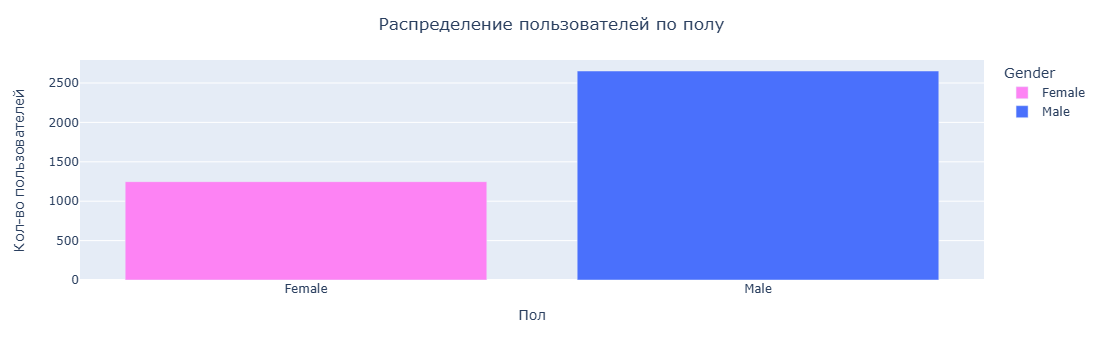

In [26]:
df_gender_count = df.groupby('Gender')['Gender'].value_counts().reset_index()
fig = px.bar(df_gender_count, 
             x = 'Gender', y = 'count', 
             color = 'Gender', 
             color_discrete_map = {'Female': 'rgb(253, 131,244)', 'Male': 'rgb(74, 112,252)'})

fig.update_layout(
    title_text = 'Распределение пользователей по полу',
    title_x = 0.5,
    xaxis_title = 'Пол',
    yaxis_title = 'Кол-во пользователей'
)

**Определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары**

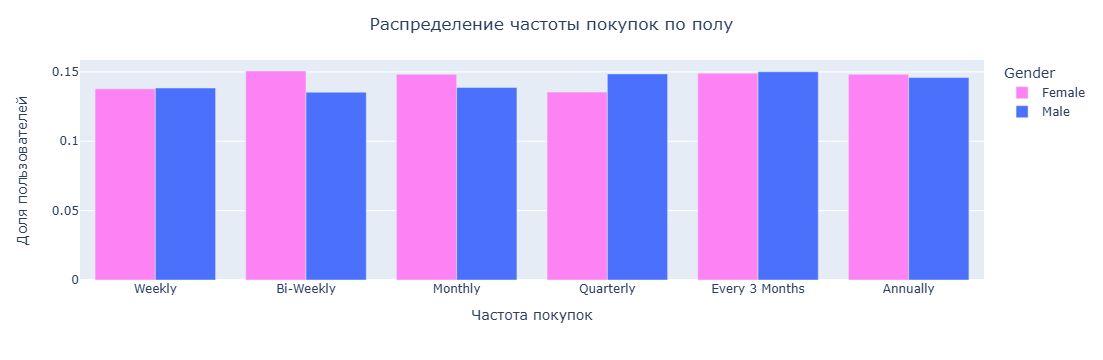

In [27]:
gender_frequency_purchases = (df.groupby(['Gender','Frequency of Purchases'])['Customer ID'].count() 
                              / df.groupby('Gender')['Customer ID'].count()).reset_index().rename(columns = {'Customer ID':'Share of users'})
gender_frequency_purchases = gender_frequency_purchases[gender_frequency_purchases['Frequency of Purchases'] != 'Fortnightly']

frequency_order = ["Weekly", "Bi-Weekly", "Monthly", "Quarterly", "Every 3 Months", "Annually"]
gender_frequency_purchases['Frequency of Purchases'] = pd.Categorical(gender_frequency_purchases['Frequency of Purchases'], 
                                                                      categories = frequency_order,
                                                                      ordered = True)
fig = px.bar(gender_frequency_purchases,
             x='Frequency of Purchases', 
             y='Share of users', 
             color='Gender',
             color_discrete_map = ({'Female': 'rgb(253, 131,244)', 'Male': 'rgb(74, 112,252)'}),
             barmode='group', 
             category_orders={'Frequency of Purchases': frequency_order}) 

fig.update_layout(
    title="Распределение частоты покупок по полу",
    title_x = 0.5,
    xaxis_title="Частота покупок",
    yaxis_title="Доля пользователей",
)

Можно сделать так, добавить еще один столбец - частота покупок в днях, чтобы можно было посчитать среднее и медиану и сравнить

In [28]:
df.groupby('Gender')['Frequency of Purchases in days'].agg(['mean', 'median'])

mean  median
Gender                    
Female  137.977564    90.0
Male    142.388763    90.0

**По гистограмме и по среднему видно, что женщины совершают покупке немного чаще**

In [29]:
df.groupby('age_group')['Frequency of Purchases in days'].agg(['mean', 'median']).sort_values(by = 'mean', ascending = True).reset_index()

age_group        mean  median
0     45-54  133.898936    90.0
1     25-34  134.956291    90.0
2     35-44  143.961591    90.0
3     55-70  145.097623    90.0
4     18-24  146.818930    90.0

**Чаще всего покупают люди возрастной группы от 45 до 54 лет**

In [30]:
df.head(2)

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   

   Location Size   Color  Season  Review Rating Subscription Status  \
0  Kentucky    L    Gray  Winter            3.1                 Yes   
1     Maine    L  Maroon  Winter            3.1                 Yes   

  Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0       Express              Yes             Yes                  14   
1       Express              Yes             Yes                   2   

  Payment Method Frequency of Purchases age_group  \
0          Venmo            Fortnightly     55-70   
1           Cash            Fortnightly     18-24   

   Frequency of Purchases in days  
0                             360  
1                             360

In [31]:
df.groupby('Gender')['Previous Purchases'].sum()

Gender
Female    30696
Male      68175
Name: Previous Purchases, dtype: int64

**Больше заказов делают мужчины**

In [32]:
df.groupby('age_group')['Previous Purchases'].sum()

age_group
18-24    11773
25-34    18902
35-44    18572
45-54    18744
55-70    30880
Name: Previous Purchases, dtype: int64

**Больше всего заказов делают люди от 55 до 70 лет**

In [33]:
df.groupby('Gender')['Purchase Amount (USD)'].agg(['mean', 'median','min','max'])

mean  median  min  max
Gender                             
Female  60.249199    60.0   20  100
Male    59.536199    60.0   20  100

**Женщины в среднем делают более дорогие заказы**

In [34]:
df.groupby('age_group')['Purchase Amount (USD)'].agg(['mean', 'median','min','max']).sort_values(by = 'mean', ascending = False)

mean  median  min  max
age_group                             
45-54      60.332447    60.0   20  100
18-24      60.201646    61.5   20  100
25-34      60.132450    61.0   20  100
35-44      59.620027    59.0   20  100
55-70      59.074703    58.5   20  100

**Люди от 45 до 54 лет делают в среднем самые дорогие заказы**

**- Определите, есть ли зависимость между цветом одежды и сезоном.**

In [35]:
color_season_crosstab = pd.crosstab(
    df[df['Category'] == 'Clothing']['Color'],  
    df[df['Category'] == 'Clothing']['Season']  
)
color_season_crosstab

Season     Fall  Spring  Summer  Winter
Color                                  
Beige        16      17      17      15
Black        22      22      21      16
Blue          7      16      14      12
Brown        16      15      10      20
Charcoal     16      21      14      22
Cyan         18      17      21      20
Gold         17      17      11      17
Gray         17      20      13      12
Green        14      22      24      18
Indigo       20      10      13      16
Lavender     13      14      17      16
Magenta      21      13      13      12
Maroon       21      21      16      25
Olive        15      18      13      15
Orange       26      20      16      16
Peach        16      20      10      19
Pink         16      21      11      25
Purple       18      18      18      18
Red          14      15      20      19
Silver       18      20      29      13
Teal         21      21      23      19
Turquoise    14      17      15      19
Violet       19      22      14      24
White        11      17      20      21
Yellow       21      20      15      19

Так как цветов слишком много, думаю что визуализации будут не совсем понятны. Предлагаю сделать стат тест проверки независимости категориальных переменных с помощью scipy.stats.chi2_contingency, уровень значимости возьмем 0.05


In [36]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(color_season_crosstab)
analysis_results = {
    "Chi2 Statistic": chi2,
    "p-value": p,
    "Degrees of Freedom": dof,
}
print(analysis_results)
if p > 0.05:
    print('Отсутствет статистически значимая зависимость между цветом одежды и сезоном.')
else:
    print('Имеется статистически значимая зависимость между цветом одежды и сезоном.')

{'Chi2 Statistic': 57.560659517252645, 'p-value': 0.8921596887226424, 'Degrees of Freedom': 72}
Отсутствет статистически значимая зависимость между цветом одежды и сезоном.


**Зависимость между цветом одежды и сезоном отсутствует**

- посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.

Так, за первый сезон будем считать зиму

In [37]:
seasonal_mau = df.groupby('Season')['Customer ID'].nunique().reset_index().rename(columns = {'Customer ID':'MAU'})
season_order = ["Winter", "Spring", "Summer", "Fall"]
seasonal_mau['Season'] = pd.Categorical(seasonal_mau['Season'], categories=season_order, ordered=True)
seasonal_mau = seasonal_mau.sort_values('Season').reset_index(drop=True)
seasonal_mau['MAU change, %']= seasonal_mau['MAU'].pct_change() * 100

seasonal_mau


Season  MAU  MAU change, %
0  Winter  971            NaN
1  Spring  999       2.883625
2  Summer  955      -4.404404
3    Fall  975       2.094241

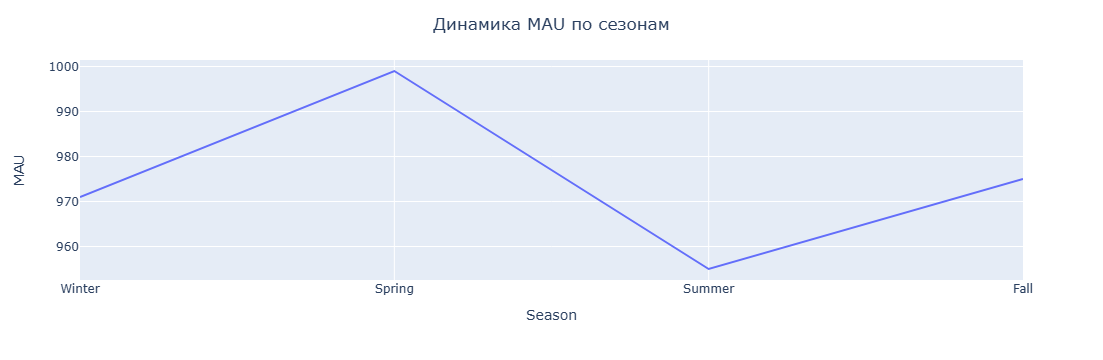

In [38]:
fig = px.line(seasonal_mau, x = 'Season', y = 'MAU')
fig.update_layout(
    title="Динамика MAU по сезонам",
    title_x = 0.5,
    xaxis_title="Season",
    yaxis_title="MAU",
)

- **найдите самую популярную букву в названии одежды.**

In [39]:
from collections import Counter

clothing_names = df[df['Category'] == 'Clothing']['Item Purchased'].dropna().str.lower()
letter_counts = Counter("".join(clothing_names))

letter_counts = {k: v for k, v in letter_counts.items() if k.isalpha()}
most_common_letter = max(letter_counts, key=letter_counts.get)
most_common_letter_count = letter_counts[most_common_letter]

print(f'Самая популярная буква в названии одежды - "{most_common_letter}". Ее частота - {most_common_letter_count}')

Самая популярная буква в названии одежды - "s". Ее частота - 2068


<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [40]:
data_alcohol = pd.read_csv("drinks.csv")

In [41]:
df_alcohol = data_alcohol.copy()

In [42]:
df_alcohol.head()

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol  
0                           0.0  
1                           4.9  
2                           0.7  
3                          12.4  
4                           5.9

In [43]:
df_alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [44]:
df_alcohol.describe()

beer_servings  spirit_servings  wine_servings  \
count     193.000000       193.000000     193.000000   
mean      106.160622        80.994819      49.450777   
std       101.143103        88.284312      79.697598   
min         0.000000         0.000000       0.000000   
25%        20.000000         4.000000       1.000000   
50%        76.000000        56.000000       8.000000   
75%       188.000000       128.000000      59.000000   
max       376.000000       438.000000     370.000000   

       total_litres_of_pure_alcohol  
count                    193.000000  
mean                       4.717098  
std                        3.773298  
min                        0.000000  
25%                        1.300000  
50%                        4.200000  
75%                        7.200000  
max                       14.400000

Давайте посмотрим на страны, которые вообще не пьют

In [45]:
df_alcohol[df_alcohol['total_litres_of_pure_alcohol'] == 0]

country  beer_servings  spirit_servings  wine_servings  \
0         Afghanistan              0                0              0   
13         Bangladesh              0                0              0   
46        North Korea              0                0              0   
79               Iran              0                0              0   
90             Kuwait              0                0              0   
97              Libya              0                0              0   
103          Maldives              0                0              0   
106  Marshall Islands              0                0              0   
107        Mauritania              0                0              0   
111            Monaco              0                0              0   
128          Pakistan              0                0              0   
147        San Marino              0                0              0   
158           Somalia              0                0              0   

     total_litres_of_pure_alcohol  
0                             0.0  
13                            0.0  
46                            0.0  
79                            0.0  
90                            0.0  
97                            0.0  
103                           0.0  
106                           0.0  
107                           0.0  
111                           0.0  
128                           0.0  
147                           0.0  
158                           0.0

In [46]:
count_countries = df_alcohol['country'].count()
not_drinking_countries = df_alcohol[df_alcohol['total_litres_of_pure_alcohol'] == 0]['country'].count()
share_not_drinking_countries = round(not_drinking_countries / count_countries*100,2) 
print(f"Всего {not_drinking_countries} не пьющих стран из {count_countries}, что составляет {share_not_drinking_countries}%")

Всего 13 не пьющих стран из 193, что составляет 6.74%


In [47]:
df_alcohol.sort_values(by = 'total_litres_of_pure_alcohol', ascending = False)

country  beer_servings  spirit_servings  wine_servings  \
15          Belarus            142              373             42   
98        Lithuania            343              244             56   
3           Andorra            245              138            312   
68          Grenada            199              438             28   
45   Czech Republic            361              170            134   
..              ...            ...              ...            ...   
79             Iran              0                0              0   
90           Kuwait              0                0              0   
128        Pakistan              0                0              0   
97            Libya              0                0              0   
0       Afghanistan              0                0              0   

     total_litres_of_pure_alcohol  
15                           14.4  
98                           12.9  
3                            12.4  
68                           11.9  
45                           11.8  
..                            ...  
79                            0.0  
90                            0.0  
128                           0.0  
97                            0.0  
0                             0.0  

[193 rows x 5 columns]

### Посмотрим на распределения потребления алкоголя

In [48]:
fig, axes = plt.subplots(2,2, figsize = (15,7))

axes[0, 0].hist(df_alcohol['beer_servings'], bins=20, color='yellow', alpha=0.7)
axes[0, 0].set_title(
    'Распределение потребления условных порций пива на душу населения',
    fontdict = {'fontsize': 10} )

axes[0, 1].hist(df_alcohol['wine_servings'], bins=20, color='purple', alpha=0.7)
axes[0, 1].set_title(
    'Распределение потребления условных порций вина на душу населения',
    fontdict = {'fontsize': 10} )

axes[1, 0].hist(df_alcohol['spirit_servings'], bins=20, color='red', alpha=0.7)
axes[1, 0].set_title(
    'Распределение потребления условных порций крепкого алкоголя на душу населения',
    fontdict = {'fontsize': 10})

axes[1, 1].hist(df_alcohol['total_litres_of_pure_alcohol'], bins=20, color='blue', alpha=0.7)
axes[1, 1].set_title(
    'Распределение потребления литров чистого спирта на душу населения',
    fontdict = {'fontsize': 10});

In [49]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_alcohol[['beer_servings','wine_servings', 'spirit_servings']].values, 
            labels=df_alcohol[['beer_servings','wine_servings', 'spirit_servings']].columns)
plt.ylabel('Условных порций на душу населения')
plt.grid(axis='y')
plt.show()

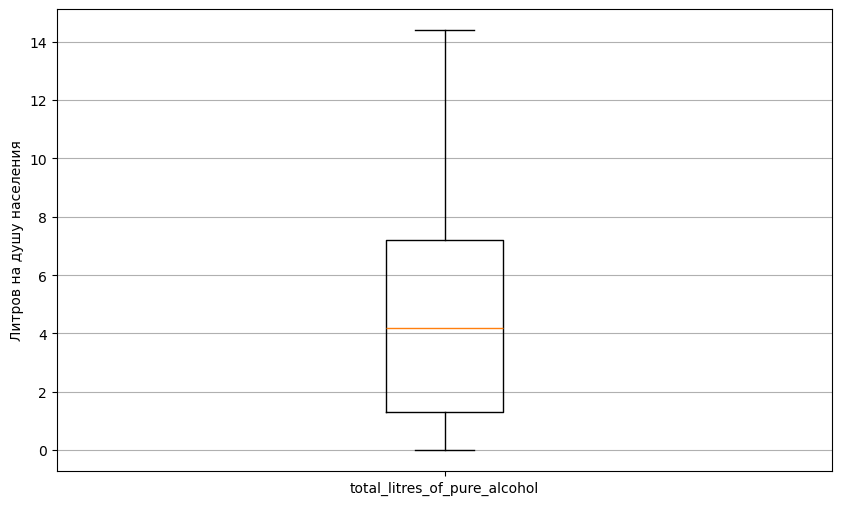

In [50]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_alcohol[['total_litres_of_pure_alcohol']].values, 
            labels=df_alcohol[['total_litres_of_pure_alcohol']].columns)
plt.ylabel('Литров на душу населения')
plt.grid(axis='y')
plt.show()


### Проанализируем страны по потреблению чистого спирта

In [51]:
df_alcohol['share_beer_servings, %'] = df_alcohol['beer_servings'] / df_alcohol['beer_servings'].sum() * 100
df_alcohol['share_spirit_servings, %'] = df_alcohol['spirit_servings'] / df_alcohol['spirit_servings'].sum() * 100
df_alcohol['share_wine_servings, %'] = df_alcohol['wine_servings'] / df_alcohol['wine_servings'].sum() * 100
df_alcohol['share_pure_alchocol, %'] = df_alcohol['total_litres_of_pure_alcohol'] / df_alcohol['total_litres_of_pure_alcohol'].sum() * 100
df_alcohol.head(5)

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol  share_beer_servings, %  \
0                           0.0                0.000000   
1                           4.9                0.434379   
2                           0.7                0.122017   
3                          12.4                1.195764   
4                           5.9                1.059105   

   share_spirit_servings, %  share_wine_servings, %  share_pure_alchocol, %  
0                  0.000000                0.000000                0.000000  
1                  0.844422                0.565801                0.538225  
2                  0.000000                0.146689                0.076889  
3                  0.882805                3.269070                1.362039  
4                  0.364637                0.471500                0.648067

#### Топ-10 стран по употреблению чистого алкоголя

In [52]:
top_pure = df_alcohol[['country', 'total_litres_of_pure_alcohol', 'share_pure_alchocol, %']] \
    .sort_values(by='total_litres_of_pure_alcohol', ascending=False) \
    .reset_index(drop=True)
top_pure.head(10)

country  total_litres_of_pure_alcohol  share_pure_alchocol, %
0             Belarus                          14.4                1.581722
1           Lithuania                          12.9                1.416960
2             Andorra                          12.4                1.362039
3             Grenada                          11.9                1.307118
4      Czech Republic                          11.8                1.296134
5              France                          11.8                1.296134
6  Russian Federation                          11.5                1.263181
7             Ireland                          11.4                1.252197
8            Slovakia                          11.4                1.252197
9          Luxembourg                          11.4                1.252197

In [53]:
def place(place_russia):
    if place_russia <= 10:
        print(f'Россия на {place_russia} месте!!! Гордимся!!!')
    else:
        print(f'Россия на {place_russia} месте(( Нужно больше работать в этом направлении!')

**Обязательно нужно узнать на каком месте Россия!!!!!**

In [54]:
place_russia = top_pure[top_pure['country'] == 'Russian Federation'].index[0] + 1
place(place_russia)

Россия на 7 месте!!! Гордимся!!!


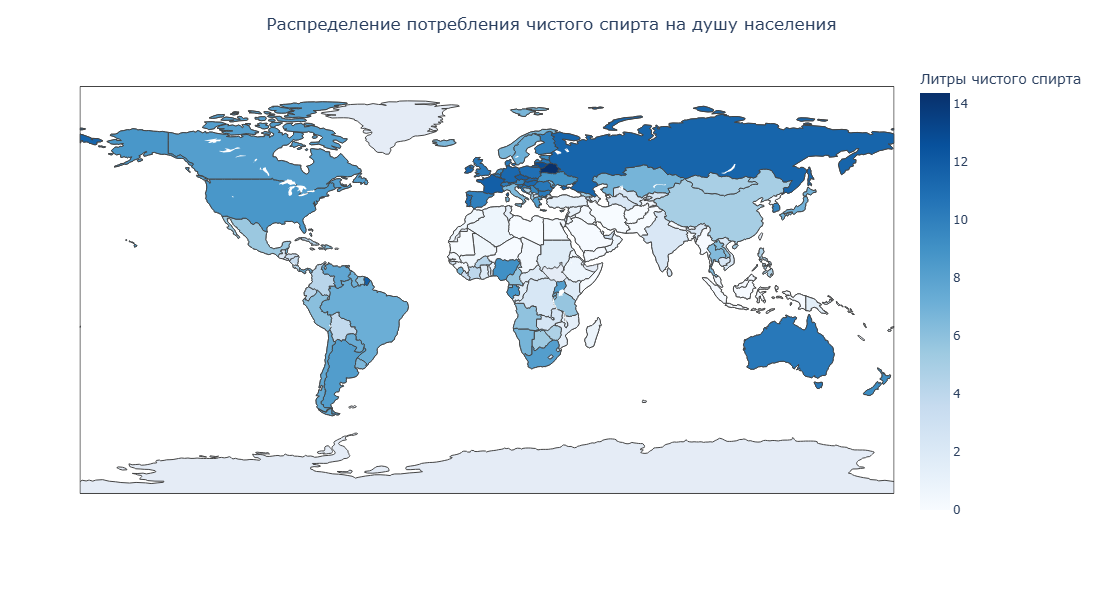

In [55]:
fig = px.choropleth(
    df_alcohol,
    locations="country",
    locationmode="country names",
    color="total_litres_of_pure_alcohol",
    color_continuous_scale="Blues",
    labels={"total_litres_of_pure_alcohol": "Литры чистого спирта"},
    width=1000, 
    height=600,  
)

fig.update_layout(
    title="Распределение потребления чистого спирта на душу населения",
    title_x = 0.5,
)

# Show the map
fig.show()

#### Топ-10 стран по среднегодовому употреблению условных порций пива на душу населения 

In [56]:
top_beer = df_alcohol[['country', 'beer_servings', 'share_beer_servings, %']] \
    .sort_values(by='beer_servings', ascending=False) \
    .reset_index(drop=True)
top_beer.head(10)

country  beer_servings  share_beer_servings, %
0         Namibia            376                1.835131
1  Czech Republic            361                1.761921
2           Gabon            347                1.693592
3         Germany            346                1.688711
4       Lithuania            343                1.674069
5          Poland            343                1.674069
6       Venezuela            333                1.625262
7         Ireland            313                1.527649
8           Palau            306                1.493484
9         Romania            297                1.449558

In [57]:
place_russia = top_beer[top_beer['country'] == 'Russian Federation'].index[0] + 1
place(place_russia)

Россия на 23 месте(( Нужно больше работать в этом направлении!


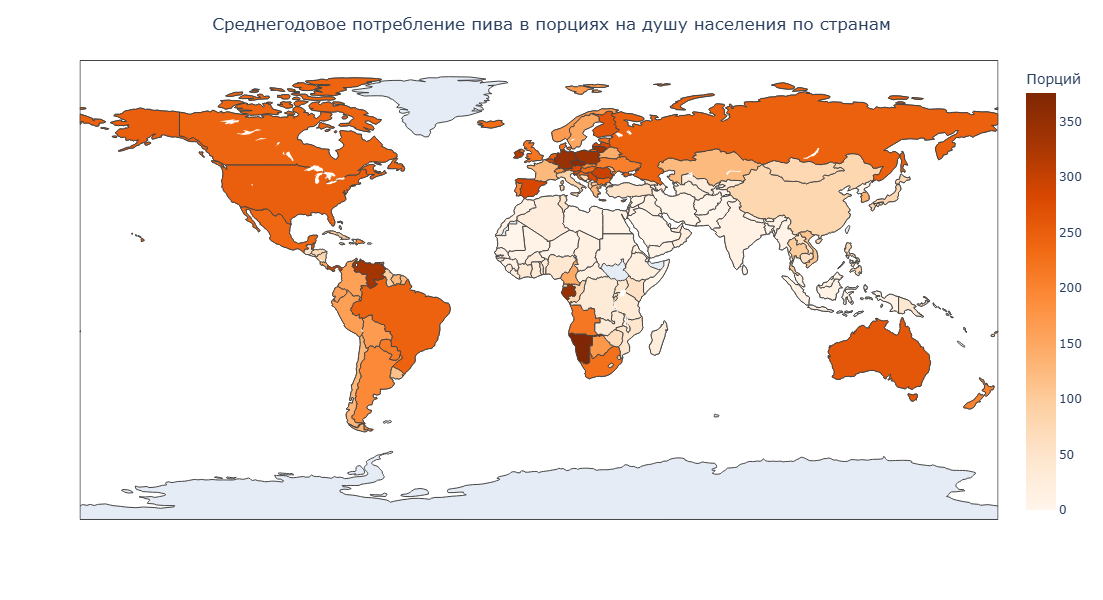

In [58]:
fig = px.choropleth(
    df_alcohol,
    locations="country",
    locationmode="country names",
    color="beer_servings",
    color_continuous_scale="Oranges",
    labels={"beer_servings": "Порций"},
    width=1000,  
    height=600,  
)

fig.update_layout(
    title="Среднегодовое потребление пива в порциях на душу населения по странам",
    title_x = 0.5,
)

# Show the map
fig.show()

#### Топ-10 стран по среднегодовому употреблению условных порций крепкого алкоголя на душу населения 

In [59]:
top_spirit = df_alcohol[['country', 'spirit_servings', 'share_spirit_servings, %']] \
    .sort_values(by='spirit_servings', ascending=False) \
    .reset_index(drop=True)
top_spirit.head(10)

country  spirit_servings  share_spirit_servings, %
0             Grenada              438                  2.801945
1             Belarus              373                  2.386131
2               Haiti              326                  2.085466
3  Russian Federation              326                  2.085466
4           St. Lucia              315                  2.015097
5              Guyana              302                  1.931934
6            Slovakia              293                  1.874360
7            Dominica              286                  1.829580
8            Thailand              258                  1.650461
9        Cook Islands              254                  1.624872

In [60]:
place_russia = top_spirit[top_spirit['country'] == 'Russian Federation'].index[0] + 1
place(place_russia)

Россия на 4 месте!!! Гордимся!!!


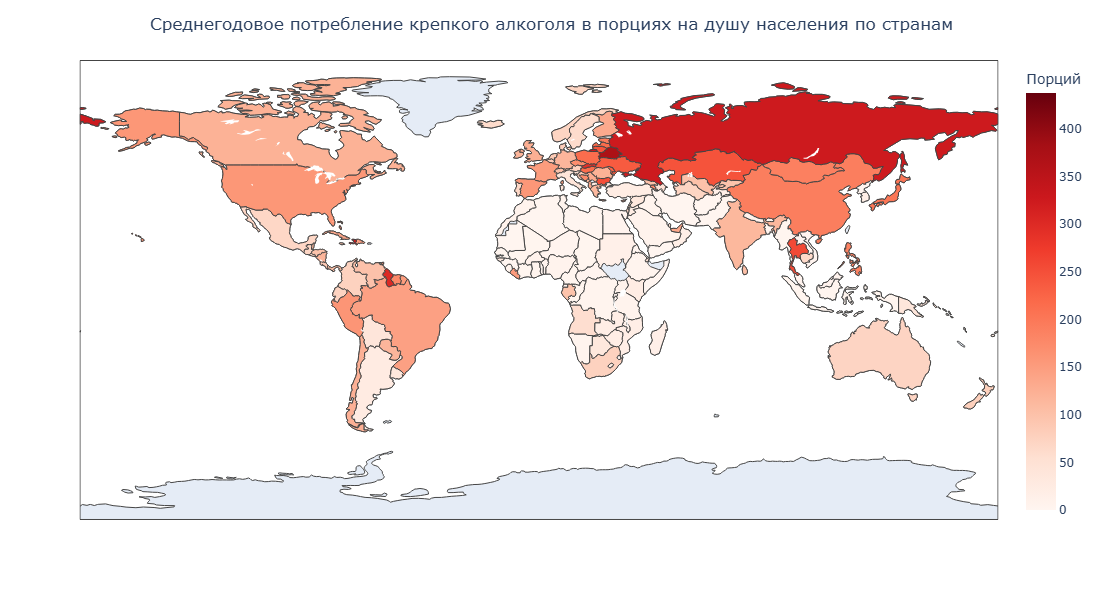

In [61]:
fig = px.choropleth(
    df_alcohol,
    locations="country",
    locationmode="country names",
    color="spirit_servings",
    color_continuous_scale="Reds",
    labels={"spirit_servings": "Порций"},
    width=1000,  
    height=600, 
)

fig.update_layout(
    title="Среднегодовое потребление крепкого алкоголя в порциях на душу населения по странам",
    title_x = 0.5,
)

# Show the map
fig.show()

#### Топ-10 стран по среднегодовому употреблению условных порций вина на душу населения 

In [62]:
top_wine = df_alcohol[['country', 'wine_servings', 'share_wine_servings, %']] \
    .sort_values(by='wine_servings', ascending=False) \
    .reset_index(drop=True)
top_wine.head(10)

country  wine_servings  share_wine_servings, %
0             France            370                3.876781
1           Portugal            339                3.551970
2            Andorra            312                3.269070
3        Switzerland            280                2.933780
4            Denmark            278                2.912825
5           Slovenia            276                2.891869
6         Luxembourg            271                2.839480
7            Croatia            254                2.661358
8              Italy            237                2.483236
9  Equatorial Guinea            233                2.441324

In [63]:
place_russia = top_wine[top_wine['country'] == 'Russian Federation'].index[0] + 1
place(place_russia)

Россия на 46 месте(( Нужно больше работать в этом направлении!


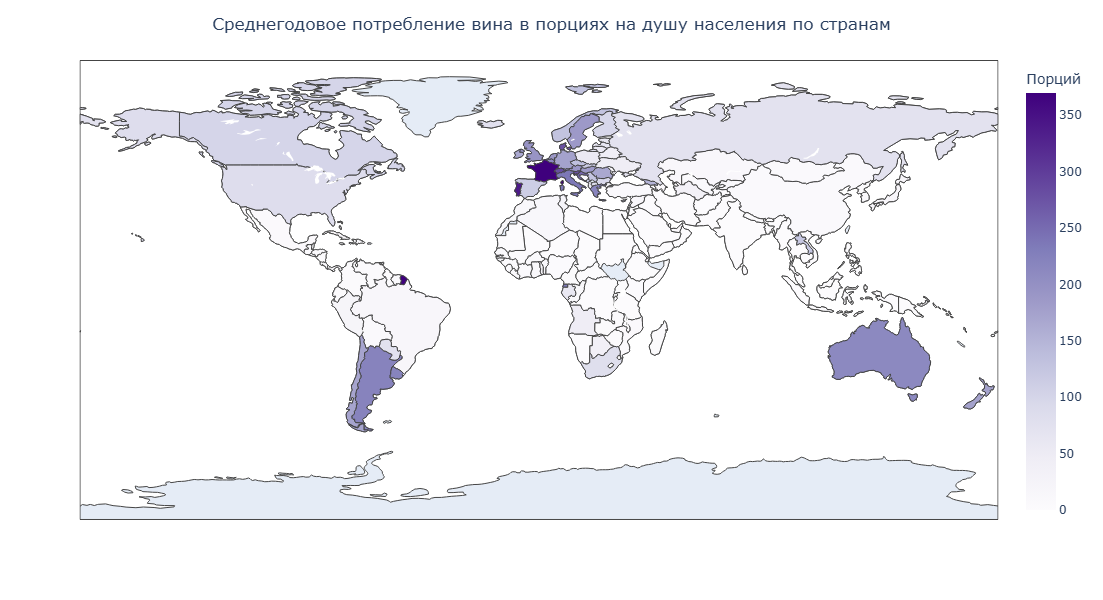

In [64]:
fig = px.choropleth(
    df_alcohol,
    locations="country",
    locationmode="country names",
    color="wine_servings",
    color_continuous_scale="Purples",
    labels={"wine_servings": "Порций"},
    width=1000,  
    height=600,  
)

fig.update_layout(
    title="Среднегодовое потребление вина в порциях на душу населения по странам",
    title_x = 0.5,
)

# Show the map
fig.show()

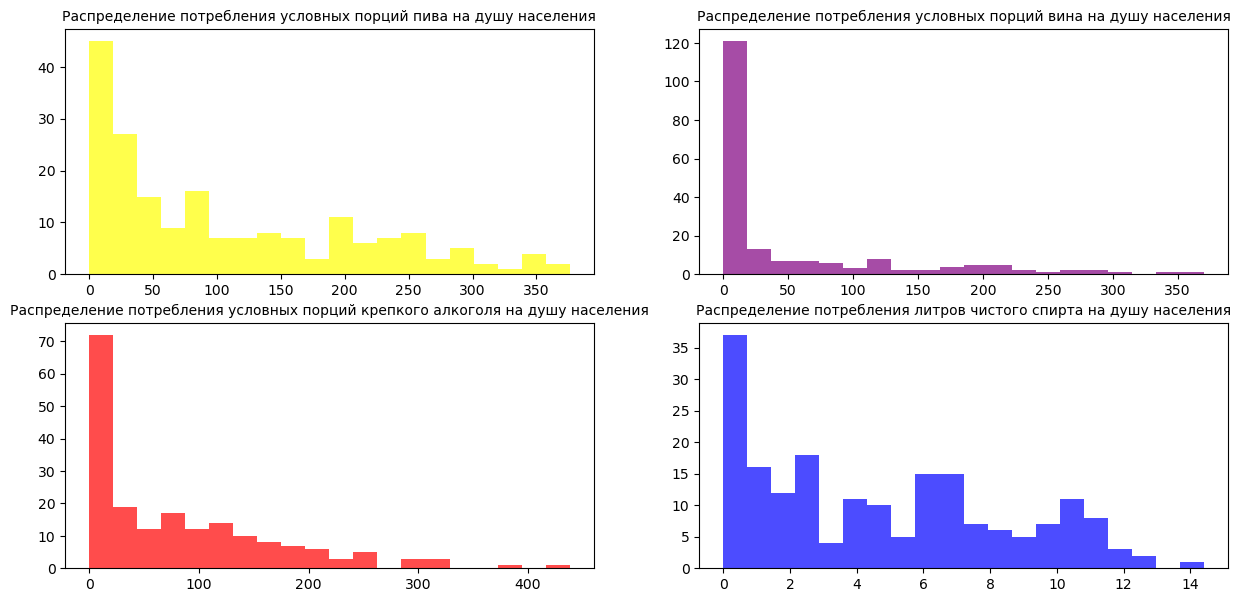

In [65]:
fig, axes = plt.subplots(2,2, figsize = (15,7))

axes[0, 0].hist(df_alcohol['beer_servings'], bins=20, color='yellow', alpha=0.7)
axes[0, 0].set_title(
    'Распределение потребления условных порций пива на душу населения',
    fontdict = {'fontsize': 10} )

axes[0, 1].hist(df_alcohol['wine_servings'], bins=20, color='purple', alpha=0.7)
axes[0, 1].set_title(
    'Распределение потребления условных порций вина на душу населения',
    fontdict = {'fontsize': 10} )

axes[1, 0].hist(df_alcohol['spirit_servings'], bins=20, color='red', alpha=0.7)
axes[1, 0].set_title(
    'Распределение потребления условных порций крепкого алкоголя на душу населения',
    fontdict = {'fontsize': 10})

axes[1, 1].hist(df_alcohol['total_litres_of_pure_alcohol'], bins=20, color='blue', alpha=0.7)
axes[1, 1].set_title(
    'Распределение потребления литров чистого спирта на душу населения',
    fontdict = {'fontsize': 10});

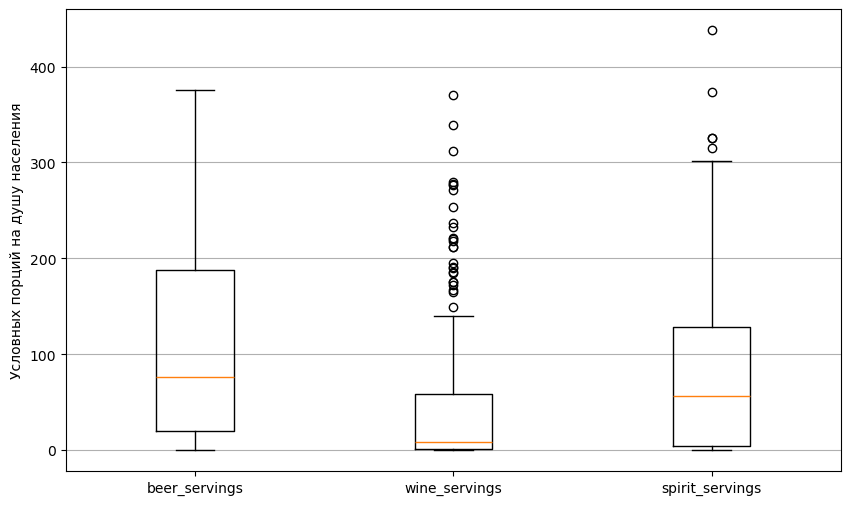

In [66]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_alcohol[['beer_servings','wine_servings', 'spirit_servings']].values, 
            labels=df_alcohol[['beer_servings','wine_servings', 'spirit_servings']].columns)
plt.ylabel('Условных порций на душу населения')
plt.grid(axis='y')
plt.show()

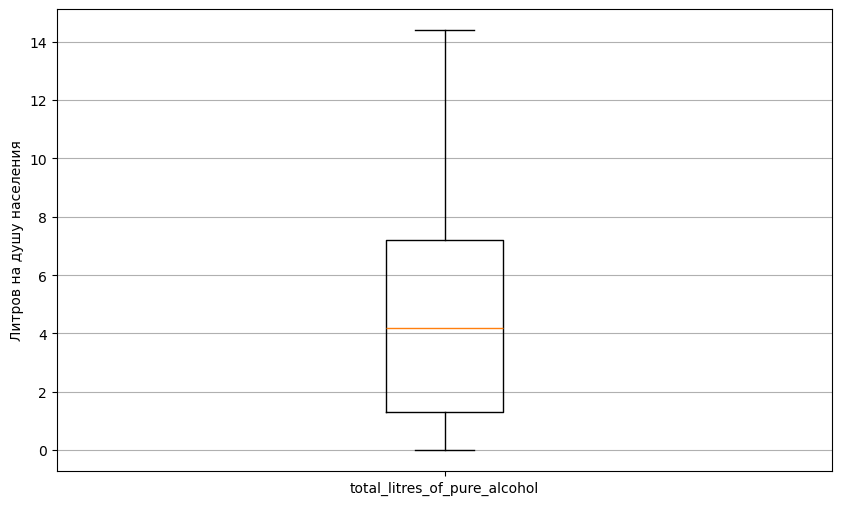

In [67]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_alcohol[['total_litres_of_pure_alcohol']].values, 
            labels=df_alcohol[['total_litres_of_pure_alcohol']].columns)
plt.ylabel('Литров на душу населения')
plt.grid(axis='y')
plt.show()


<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 

In [68]:
data_tarantino = pd.read_csv("tarantino.csv")
df_tarantino = data_tarantino.copy()

In [69]:
data_tarantino.head(5)

movie  type      word  minutes_in
0  Reservoir Dogs  word      dick        0.40
1  Reservoir Dogs  word     dicks        0.43
2  Reservoir Dogs  word    fucked        0.55
3  Reservoir Dogs  word   fucking        0.61
4  Reservoir Dogs  word  bullshit        0.61

In [70]:
df_tarantino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


In [71]:
df_tarantino['word'].isna().sum()

190

In [72]:
df_tarantino[df_tarantino['word'].isna()]

movie   type word  minutes_in
268     Reservoir Dogs  death  NaN       59.93
385     Reservoir Dogs  death  NaN       85.58
386     Reservoir Dogs  death  NaN       85.58
387     Reservoir Dogs  death  NaN       85.81
389     Reservoir Dogs  death  NaN       86.55
...                ...    ...  ...         ...
1521  Django Unchained  death  NaN      160.45
1625      Jackie Brown  death  NaN       23.08
1807      Jackie Brown  death  NaN      113.28
1840      Jackie Brown  death  NaN      125.43
1893      Jackie Brown  death  NaN      143.13

[190 rows x 4 columns]

In [73]:
df_tarantino.describe(include = ['object'])

movie  type     word
count           1894  1894     1704
unique             7     2       60
top     Pulp Fiction  word  fucking
freq             476  1704      407

In [74]:
df_tarantino['type'].unique()

array(['word', 'death'], dtype=object)

In [75]:
df_tarantino['word'].unique()

array(['dick', 'dicks', 'fucked', 'fucking', 'bullshit', 'fuck', 'shit',
       'motherfucker', 'pussy', 'fucks', 'hell', 'jap', 'bastard',
       'goddamn', 'motherfuckers', 'asshole', 'ass', 'assholes',
       'n-word ', 'asses', 'bitch', 'fuckup', 'fucker', 'shitty',
       'asshead', 'damn', nan, 'damned', 'bitches', 'wetback', 'faggot',
       'cocksucker', 'gook', 'fuckers', 'gooks', 'motherfucking',
       'dickless', 'chickenshit', 'slope', 'fuckhead', 'merde',
       'shithead', 'cunt', 'cunts', 'fuckface', 'cockblockery', 'japs',
       'jew (verb)', 'bastards', 'horeshit', 'shitless', 'shitting',
       'negro ', 'squaw', 'slut', 'goddamned', 'jackass', 'horseshit',
       'shittiest', 'shitload', 'dumbass'], dtype=object)

In [76]:
death_word_ratio = pd.crosstab(df_tarantino['movie'], df_tarantino['type']).reset_index()
death_word_ratio['word_death_ratio'] = death_word_ratio['word'] / death_word_ratio['death']
death_word_ratio

type                movie  death  word  word_death_ratio
0        Django Unchained     47   262          5.574468
1     Inglorious Basterds     48    58          1.208333
2            Jackie Brown      4   368         92.000000
3       Kill Bill: Vol. 1     63    57          0.904762
4       Kill Bill: Vol. 2     11    69          6.272727
5            Pulp Fiction      7   469         67.000000
6          Reservoir Dogs     10   421         42.100000

In [77]:
word_counter = df_tarantino[df_tarantino['type'] == 'word']['word'].value_counts().reset_index()
word_counter['%'] = word_counter['count'] / word_counter['count'].sum()
word_counter

word  count         %
0         fucking    407  0.238850
1            shit    221  0.129695
2            fuck    213  0.125000
3         n-word     179  0.105047
4             ass    140  0.082160
5         goddamn    113  0.066315
6    motherfucker     70  0.041080
7           bitch     64  0.037559
8            hell     45  0.026408
9            damn     37  0.021714
10  motherfucking     27  0.015845
11         fucked     25  0.014671
12       bullshit     15  0.008803
13  motherfuckers     15  0.008803
14           dick     14  0.008216
15          pussy     11  0.006455
16        asshole     10  0.005869
17        bastard     10  0.005869
18        bitches      9  0.005282
19         fucker      8  0.004695
20       assholes      5  0.002934
21         negro       5  0.002934
22          dicks      5  0.002934
23          asses      4  0.002347
24         shitty      4  0.002347
25         damned      3  0.001761
26          fucks      3  0.001761
27       shithead      3  0.001761
28      horseshit      2  0.001174
29          gooks      2  0.001174
30           japs      2  0.001174
31           cunt      2  0.001174
32       shitload      2  0.001174
33     cocksucker      2  0.001174
34        wetback      2  0.001174
35        fuckers      1  0.000587
36       horeshit      1  0.000587
37            jap      1  0.000587
38      shittiest      1  0.000587
39         fuckup      1  0.000587
40        jackass      1  0.000587
41      goddamned      1  0.000587
42           slut      1  0.000587
43          squaw      1  0.000587
44        asshead      1  0.000587
45       shitting      1  0.000587
46       shitless      1  0.000587
47       bastards      1  0.000587
48       dickless      1  0.000587
49     jew (verb)      1  0.000587
50   cockblockery      1  0.000587
51       fuckface      1  0.000587
52          cunts      1  0.000587
53         faggot      1  0.000587
54           gook      1  0.000587
55          merde      1  0.000587
56       fuckhead      1  0.000587
57          slope      1  0.000587
58    chickenshit      1  0.000587
59        dumbass      1  0.000587

In [78]:
df_tarantino['word_time_diff'] = (
    df_tarantino
    .sort_values(by=['movie', 'minutes_in']) 
    .groupby('movie')['minutes_in']          
    .diff()
)

In [79]:
df_tarantino['word_time_diff'].min()

0.0

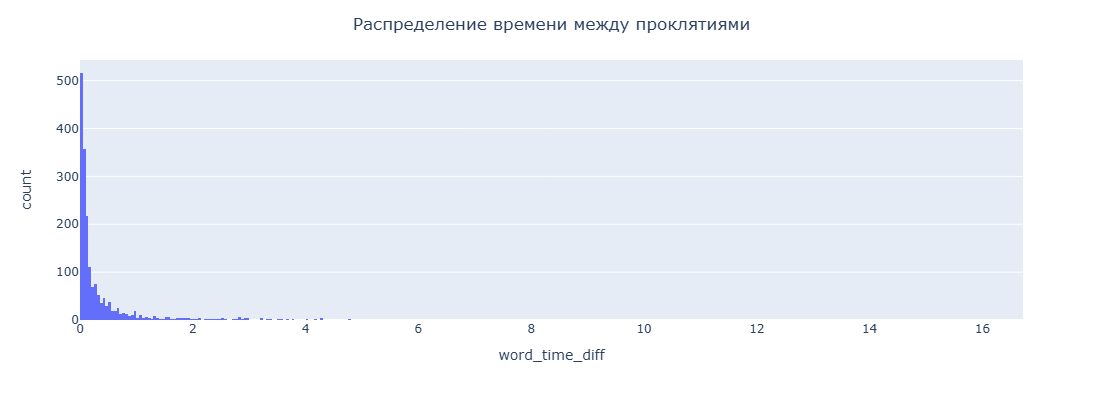

In [80]:
fig = px.histogram(
    df_tarantino,
    x = 'word_time_diff',
    nbins = 50
)

fig.update_traces(
    xbins=dict(
        start=0,  # Начинаем с 0
        end=df_tarantino['word_time_diff'].max(),  # Конец биннинга
        size=0.05  # Размер одного бина
    )
)

fig.update_layout(
    xaxis=dict(range=[0, df_tarantino['word_time_diff'].max()]),
    title = 'Распределение времени между проклятиями ',
    title_x = 0.5,
    width=1000, 
    height=400
)

Видим, что у нас есть много выбросов. Давайте уберем их с помощью IQR

In [81]:
Q1 = df_tarantino['word_time_diff'].quantile(0.25)
Q3 = df_tarantino['word_time_diff'].quantile(0.75) 
IQR = Q3 - Q1
df_no_outliers = df_tarantino[
    (df_tarantino['word_time_diff'] >= Q1 - 1.5 * IQR) &
    (df_tarantino['word_time_diff'] <= Q3 + 1.5 * IQR)
]

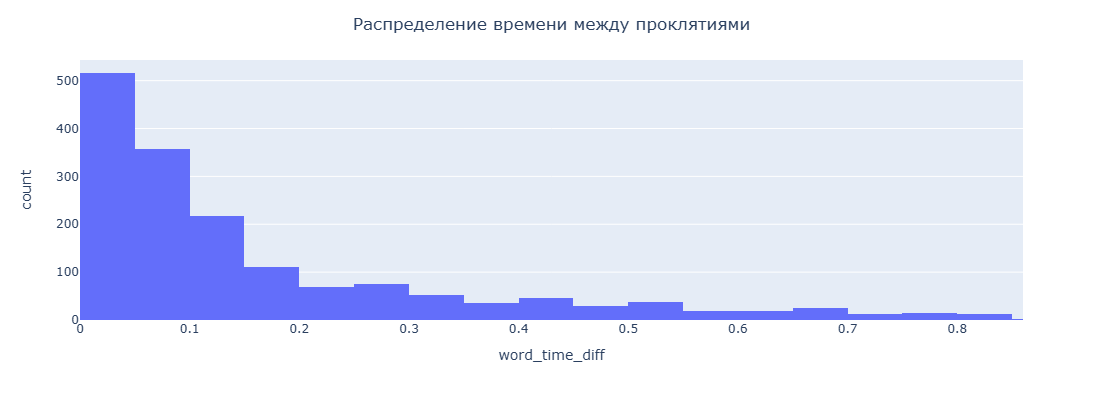

In [82]:
fig = px.histogram(
    df_no_outliers,
    x = 'word_time_diff',
    nbins = 50
)

fig.update_traces(
    xbins=dict(
        start=0, 
        end=df_no_outliers['word_time_diff'].max(),  
        size=0.05 
    )
)

fig.update_layout(
    xaxis=dict(range=[0, df_no_outliers['word_time_diff'].max()]),
    title = 'Распределение времени между проклятиями ',
    title_x = 0.5,
    width=1000, 
    height=400
)